<a href="https://colab.research.google.com/github/kmkarakaya/btk_rag_bot_egitimi/blob/main/3_3_Gemini_Yaz%C4%B1l%C4%B1m_Geli%C5%9Ftirme_Kiti_(SDK)_Kullan%C4%B1m%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

[İngilizce versiyonundan](https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb) genişletilip geliştirilmiştir.

2025 KMK

In [70]:
# @title Apache Lisansı, Sürüm 2.0 (bu "Lisans") altında lisanslanmıştır;
#
# Apache Lisansı, Sürüm 2.0 ("Lisans") altında lisanslanmıştır;
# bu dosyayı Lisans'a uymadan kullanamazsınız.
# Lisans'ın bir kopyasını şu adresten edinebilirsiniz:
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Yürürlükteki yasalarca gerekmedikçe veya yazılı olarak kabul edilmedikçe,
# Lisans altında dağıtılan yazılım "OLDUĞU GİBİ",
# AÇIK VEYA ZIMNİ GARANTİLER VEYA KOŞULLAR OLMAKSIZIN dağıtılır.
# Lisans kapsamında belirli bir dil için geçerli olan izinleri ve
# sınırlamaları görmek için Lisans'a bakın.

## Gemini API: Gemini Modelleriyle Başlangıç

Yeni **Google Gen AI Yazılım Geliştirme Kiti (SDK)**, hem Gemini Geliştirici (Developer) API'si hem de Vertex AI üzerindeki Gemini API'si aracılığıyla Gemini modellerine birleşik bir arayüz sağlar. Birkaç istisna dışında, bir platformda çalışan kod her ikisinde de çalışacaktır. Bu not defteri Geliştirici API'sini kullanır.

Bu not defteri size şunları adım adım gösterecektir:

*   Google GenAI SDK'yı Yükleme ve Kurulumu
*   Metin ve çok modlu istemler
*   Tokenları sayma
*   Sistem talimatlarını ayarlama
*   Güvenlik filtrelerini yapılandırma
*   Çok turlu bir sohbet başlatma
*   Üretilen çıktıyı kontrol etme
*   İçerik akışı oluşturma ve eş zamansız istekler gönderme
*   Metin gömmeleri oluşturma

Bu yeni SDK hakkında daha fazla bilgiye not defterin sonundaki belgelerden ulaşabilirsiniz.

## Kurulum

### SDK'yı Yükle

SDK'yı [PyPI](https://github.com/googleapis/python-genai) 'dan yükleyin..

In [8]:
%pip install -U -q 'google-genai>=1.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.7/217.7 kB 14.7 MB/s eta 0:00:00


### API Anahtarınızı Kurun

Aşağıdaki hücreyi çalıştırmak için API anahtarınız `GOOGLE_API_KEY` adlı bir Colab Secret'ta saklanmalıdır. Halihazırda bir API anahtarınız yoksa veya bir Colab Secret'ı nasıl oluşturacağınızdan emin değilseniz, bir önceki bölümü izleyiniz.

In [72]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### SDK istemcisini başlat

Yeni SDK ile artık bir istemciyi API anahtarınızla başlatmanız yeterlidir. Model artık her çağrıda ayarlanır.

In [73]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

## Metin Üretimi

### Bir model seçin

Bu kılavuzda kullanmak istediğiniz modeli seçin. Listeden birini seçebilir veya manuel olarak bir model adı girebilirsiniz. Bazı modellerin, örneğin 2.5 modellerinin düşünme modelleri olduğunu ve bu nedenle yanıt vermek için biraz daha fazla zaman aldığını unutmayın.

Tüm Gemini modellerinin tam bir genel görünümü için [belgelere](https://ai.google.dev/gemini-api/docs/models/gemini) göz atın.

In [74]:
MODEL_ID = "gemini-2.0-flash"

### Metin yönlendirmelerini (prompt) gönderin



Yönlendirmelerinize yanıtlar oluşturmak için `generate_content` yöntemini kullanın. Metni doğrudan `generate_content`'a iletebilir ve yanıtın metin içeriğini almak için `.text` özelliğini kullanabilirsiniz. `.text` alanının, çıktıda yalnızca tek bir bölüm olduğunda çalışacağını unutmayın.

In [75]:
user_prompt="2025 yılında Türkiye'nin en az nüfuslu ili hangisidir?"

In [76]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents=user_prompt
)

In [77]:
print(response.text)

2025 yılı için kesin bir tahminde bulunmak zor olsa da, mevcut demografik eğilimler ve geçmiş veriler göz önüne alındığında, **Bayburt**'un Türkiye'nin en az nüfuslu ili olmaya devam etmesi büyük olasılıktır.

Bayburt, uzun yıllardır Türkiye'nin en düşük nüfusa sahip ili konumundadır. 2023 sonu itibarıyla Türkiye İstatistik Kurumu (TÜİK) verilerine göre nüfusu 84.241 olarak açıklanmıştır. Genellikle ikinci sırada Tunceli gelmektedir.

Büyük ve ani bir göç hareketi veya nüfus dinamiklerini etkileyecek önemli bir gelişme olmadığı sürece bu sıralamanın 2025'te de değişmesi beklenmez.


In [78]:
Markdown(response.text)

2025 yılı için kesin bir tahminde bulunmak zor olsa da, mevcut demografik eğilimler ve geçmiş veriler göz önüne alındığında, **Bayburt**'un Türkiye'nin en az nüfuslu ili olmaya devam etmesi büyük olasılıktır.

Bayburt, uzun yıllardır Türkiye'nin en düşük nüfusa sahip ili konumundadır. 2023 sonu itibarıyla Türkiye İstatistik Kurumu (TÜİK) verilerine göre nüfusu 84.241 olarak açıklanmıştır. Genellikle ikinci sırada Tunceli gelmektedir.

Büyük ve ani bir göç hareketi veya nüfus dinamiklerini etkileyecek önemli bir gelişme olmadığı sürece bu sıralamanın 2025'te de değişmesi beklenmez.

In [79]:
print(response)

sdk_http_response=HttpResponse(
  headers=<dict len=10>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text="""2025 yılı için kesin bir tahminde bulunmak zor olsa da, mevcut demografik eğilimler ve geçmiş veriler göz önüne alındığında, **Bayburt**'un Türkiye'nin en az nüfuslu ili olmaya devam etmesi büyük olasılıktır.

Bayburt, uzun yıllardır Türkiye'nin en düşük nüfusa sahip ili konumundadır. 2023 sonu itibarıyla Türkiye İstatistik Kurumu (TÜİK) verilerine göre nüfusu 84.241 olarak açıklanmıştır. Genellikle ikinci sırada Tunceli gelmektedir.

Büyük ve ani bir göç hareketi veya nüfus dinamiklerini etkileyecek önemli bir gelişme olmadığı sürece bu sıralamanın 2025'te de değişmesi beklenmez."""
      ),
    ],
    role='model'
  ),
  finish_reason=<FinishReason.STOP: 'STOP'>,
  index=0
)] create_time=None response_id=None model_version='gemini-2.5-flash' prompt_feedback=None usage_metadata=GenerateContentResponseUsageMetadata(
  candidates_token_count=173,
  

### Gemini'den Gelen Cevabı (Response) İnceleyin



Gemini'ye bir soru sorduğunuzda, size sadece cevabı göndermez; cevabın nasıl oluşturulduğuna dair tüm detayları içeren zengin bir "bilgi paketi" yollar. İşte bu paket `GenerateContentResponse` nesnesidir. Gelin bu paketin içindeki en önemli parçaları birlikte inceleyelim.

Bunu, size gelen bir kargo paketi gibi düşünebilirsiniz:

---

#### 1. Paketin İçindeki Asıl Ürün: `candidates`

Bu, en çok ilgilendiğiniz kısımdır: Modelin sizin için ürettiği **cevabın kendisi**.

*   **Neden bir liste (`[]`) içinde?** Model teorik olarak aynı soruya birden fazla cevap alternatifi üretebilir. Ancak genellikle tek ve en iyi cevabı alırsınız.
*   **Cevabı nasıl alırsınız?** İlk ve genelde tek olan cevabın metnine ulaşmak için:
    `response.candidates[0].content.parts[0].text`

> **Özetle:** Burası, modelin "2025 yılında Türkiye'nin en az nüfuslu ili..." diye başlayan asıl metninin bulunduğu yerdir.

---

#### 2. Kullanım Faturası: `usage_metadata`

Bu bölüm, yaptığınız isteğin size "maliyetini" token cinsinden gösterir. API kullanımınızı takip etmek ve faturalandırmayı anlamak için en önemli kısımdır.

*   `prompt_token_count` (Giriş Maliyeti): Sizin sorduğunuz sorunun token sayısı. (Örnek: 19)
*   `candidates_token_count` (Cevap Maliyeti): Modelin ürettiği cevabın token sayısı. (Örnek: 140)
*   `thoughts_token_count` (Düşünme Maliyeti): **Bu çok önemli!** Modelin cevabı bulmak için arka planda yaptığı düşünme, planlama ve ara hesaplamaların maliyetidir. Bunu, modelin cevabı yazmadan önce kullandığı bir "karalama kağıdı" gibi düşünebilirsiniz. (Örnek: 992)
*   `total_token_count` (Toplam Maliyet): Yukarıdakilerin hepsinin toplamıdır. Bu yüzden toplam token sayısı, sadece soru ve cevabın toplamından daha fazladır! (Örnek: 1151)

> **Özetle:** Bu bölüm, isteğinizin ne kadar "pahalı" olduğunu anlamanızı sağlar.

---

#### 3. Cevabın Durumu: `finish_reason`

Modelin cevabı neden ve nasıl sonlandırdığını belirtir. Bu, cevabın sağlıklı bir şekilde tamamlanıp tamamlanmadığını kontrol etmek için kritiktir.

*   `STOP`: Her şey yolunda. Model söyleyeceklerini bitirdi ve doğal bir şekilde durdu. (En sık görülen durum)
*   `MAX_TOKENS`: Cevap çok uzundu ve izin verilen maksimum token limitine ulaştığı için kesildi. Cevabın sonu eksik olabilir.
*   `FUNCTION_CALL`: Model, işleme devam etmek için sizin tanımladığınız bir fonksiyonu (tool) çağırması gerektiğini belirtiyor.

> **Özetle:** Cevabın yarım kalıp kalmadığını veya başka bir eylem gerekip gerekmediğini buradan anlarsınız.

---

#### 4. Diğer Bilgiler

*   **`model_version` (Model Etiketi):** Cevabı hangi Gemini modelinin ürettiğini gösteren basit bir bilgi. (Örnek: "gemini-2.5-flash")
*   **`sdk_http_response` (Teknik Kargo Bilgisi):** Genellikle hata ayıklama için kullanılır. API isteğinin sunucuya ulaşıp ulaşmadığı (HTTP 200 OK gibi durum kodları) ve diğer ağ seviyesi teknik bilgileri içerir.

---

### Genel Bakış

Kısacası, `GenerateContentResponse` sadece çıplak bir metin değil; **cevabın kendisi (`candidates`)**, bu cevabın **maliyeti (`usage_metadata`)** ve **nasıl tamamlandığı (`finish_reason`)** gibi hayati bilgileri bir arada sunan, geliştiriciler için tasarlanmış eksiksiz bir rapordur.

## Maliyeti Hesabı

### Neden LLM Maliyet Hesabı Yapmalıyız?

Büyük Dil Modeli (BDM-LLM) tabanlı kod yazarken maliyet hesabı yapmak çok önemlidir, çünkü:

1.  **Kullandıkça Öde Modeli:** Her BDM çağrısı (sorunuz ve modelin cevabı), "token" adı verilen birimler üzerinden doğrudan ücrete tabidir.
2.  **Beklenmedik Faturalar:** Geliştirme sürecindeki testler veya artan kullanıcı trafiği, token kullanımını ve dolayısıyla maliyetleri hızla artırabilir. Hesaplama yaparak sürpriz faturaların önüne geçersiniz.
3.  **Bütçeleme ve Optimizasyon:** Proje bütçenizi doğru planlamanıza ve performansı düşürmeden maliyetleri optimize etmenin (örneğin daha kısa promptlar veya farklı model seçenekleri) yollarını bulmanıza yardımcı olur.
4.  **Ölçeklenebilirlik:** Uygulamanız büyüdükçe ve kullanım arttıkça maliyetlerin nasıl seyredeceğini öngörmenizi ve finansal stratejinizi buna göre belirlemenizi sağlar.

Kısacası, LLM tabanlı geliştirmede her kullanımın bir maliyeti vardır ve bu maliyeti anlamak ve yönetmek, projenizin finansal sağlığı için hayati öneme sahiptir.

### Tokenları sayın



In [80]:
try:
    usage_metadata = response.usage_metadata

    print("--- 🤖 Gemini API Token Maliyet Raporu ---")
    print(f"➡️  Girdi Token (Prompt)    : {usage_metadata.prompt_token_count}")
    print(f"⬅️  Çıktı Token (Cevap)      : {usage_metadata.candidates_token_count}")
    print(f"🧠  Düşünme Token (Arka Plan): {usage_metadata.thoughts_token_count}")
    print("-" * 40)
    print(f"💰  Toplam Faturalandırılan Token: {usage_metadata.total_token_count}")
    print("-" * 40)

except AttributeError:
    print("Hata: Yanıtta 'usage_metadata' bulunamadı. Yanıt yapısını veya isteğin başarılı olup olmadığını kontrol edin.")

--- 🤖 Gemini API Token Maliyet Raporu ---
➡️  Girdi Token (Prompt)    : 19
⬅️  Çıktı Token (Cevap)      : 173
🧠  Düşünme Token (Arka Plan): 923
----------------------------------------
💰  Toplam Faturalandırılan Token: 1115
----------------------------------------


### Maliyeti Hesaplayın

Gemini Developer API Fiyatlandırması için [bu bağlantıyı](https://ai.google.dev/gemini-api/docs/pricing?hl=tr) kullanabilirsiniz.

Ağustos 2025'de [Gemini 2.5 Flash modeli](https://ai.google.dev/gemini-api/docs/pricing?hl=tr#gemini-2.5-flash) için geçerli  1 milyon jeton başına ABD doları cinsinden
* Giriş fiyatı	Ücretsiz	0,30 ABD doları (metin / resim / video)

* Çıkış fiyatı (düşünme jetonları dahil)	Ücretsiz	2,50 ABD doları

BU verileri kullanarak toplam maliyet analizi yapabiliriz:

In [81]:
# --- Gemini 2.5 Flash Fiyatlandırması (Ağustos 2025 için verilen) ---
# Fiyatlar 1 milyon token başına ABD doları cinsindendir.
INPUT_PRICE_PER_MILLION_TOKENS = 0.30  # Giriş fiyatı (metin / resim / video)
OUTPUT_PRICE_PER_MILLION_TOKENS = 2.50 # Çıkış fiyatı (düşünme jetonları dahil)

# 1 milyon token'a bölmek için kullanılacak çarpan
TOKENS_PER_MILLION = 1_000_000

try:
    usage_metadata = response.usage_metadata

    # --- Token Sayılarını Al ---
    girdi_token = usage_metadata.prompt_token_count
    cikti_token = usage_metadata.candidates_token_count
    dusunme_token = usage_metadata.thoughts_token_count
    toplam_faturalanan_token = usage_metadata.total_token_count
    # Bu, API'nin faturaladığı toplamdır.
    # Ancak maliyet hesaplamasında, girdi ve çıktı/düşünme ayrı ayrı ele alınır.

    # --- Maliyet Hesaplamaları ---
    # Giriş Maliyeti: Sadece prompt_token_count kullanılır.
    input_cost_usd = (girdi_token / TOKENS_PER_MILLION) * INPUT_PRICE_PER_MILLION_TOKENS

    # Çıkış Maliyeti: candidates_token_count ve thoughts_token_count birleşiktir.
    # Verilen fiyata göre "düşünme jetonları dahil" olduğu belirtilmiştir.
    total_output_and_thought_tokens = cikti_token + dusunme_token
    output_cost_usd = (total_output_and_thought_tokens / TOKENS_PER_MILLION) * OUTPUT_PRICE_PER_MILLION_TOKENS

    # Toplam API Çağrı Maliyeti
    total_call_cost_usd = input_cost_usd + output_cost_usd

    # --- Sonuçları Ekrana Yazdırma ---
    print("--- 🤖 Gemini API Token Maliyet Raporu ---")
    print(f"➡️  Girdi Token (Prompt)    : {girdi_token} token")
    print(f"⬅️  Çıktı Token (Cevap)      : {cikti_token} token")
    print(f"🧠  Düşünme Token (Arka Plan): {dusunme_token} token")
    print("-" * 40)
    print(f"💰  API Tarafından Bildirilen Toplam Token: {toplam_faturalanan_token} token")
    print("-" * 40)
    print("\n--- 💲 ABD Doları Maliyet Analizi ---")
    print(f"💵 Giriş Maliyeti            : ${input_cost_usd:.8f}") # Formatlama ile daha fazla ondalık basamak gösteriyoruz
    print(f"💵 Çıkış + Düşünme Maliyeti  : ${output_cost_usd:.8f}")
    print("-" * 40)
    print(f"💸 TOPLAM ÇAĞRI MALİYETİ     : ${total_call_cost_usd:.8f}")
    print("-" * 40)

except AttributeError:
    print("Hata: 'usage_metadata' yanıtta bulunamadı. Yanıt yapısını veya isteğin başarılı olup olmadığını kontrol edin.")
    print("Eğer stream=True kullanıyorsanız, for döngüsü bittikten sonra bu koda eriştiğinizden emin olun.")

--- 🤖 Gemini API Token Maliyet Raporu ---
➡️  Girdi Token (Prompt)    : 19 token
⬅️  Çıktı Token (Cevap)      : 173 token
🧠  Düşünme Token (Arka Plan): 923 token
----------------------------------------
💰  API Tarafından Bildirilen Toplam Token: 1115 token
----------------------------------------

--- 💲 ABD Doları Maliyet Analizi ---
💵 Giriş Maliyeti            : $0.00000570
💵 Çıkış + Düşünme Maliyeti  : $0.00274000
----------------------------------------
💸 TOPLAM ÇAĞRI MALİYETİ     : $0.00274570
----------------------------------------


## Model Parametreleri



Modelin bir yanıtı nasıl oluşturduğunu kontrol etmek için, bir modele gönderdiğiniz her çağrıya parametre değerleri ekleyebilirsiniz. [Parametre değerleriyle denemeler yapma](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure) hakkında daha fazla bilgi edinin.

In [107]:
system_instruction = """
  Sen Google Gemini Büyük Dil Modeli konusunda uzmansın.
  Gemini SDK konusunda sorulacak sorulara açık, net, anlaşılır ve kısa cevaplar ver.
  Cevapların LLM kullanarak uygulama geliştirmeye yeni başlayan programcılara yol göstersin.
  En son Gemini SDK versiyonu olan 2025 için geçerli olan cevapları oluştur.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
    temperature=1.0,
    top_p=0.95,
    top_k=20,
)

In [108]:
user_prompt = """ Aşağıdaki kavramları açıkla:
- system_instruction
- temperature = 1.0
- top_p = 0.95
- top_k = 20
"""

In [109]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= user_prompt,
    config=chat_config
)
Markdown(response.text)

Elbette, Gemini SDK kullanarak LLM uygulaması geliştirmeye yeni başlayan bir programcı olarak bu kavramları senin için netleştireyim:

### `system_instruction`

*   **Nedir:** Modeline, genel davranışını, rolünü veya kişiliğini belirten bir ön talimattır. Kullanıcı girdisinden önce verilen, tüm sohbet oturumunu veya isteği etkileyen bir yönergedir.
*   **Ne İşe Yarar:** Modelin cevaplarının tutarlı bir şekilde belirli bir ton, stil veya kurallara uygun olmasını sağlar. Örneğin, modelin bir "müşteri hizmetleri temsilcisi" veya "uzman bir programlama eğitmeni" gibi davranmasını isteyebilirsin. Gemini SDK 2025 ile bu, modelin genel bağlamını belirlemenin güçlü bir yoludur.

### `temperature = 1.0`

*   **Nedir:** Modelin cevaplarının yaratıcılığını ve çeşitliliğini kontrol eden bir parametredir. 0.0 ile 1.0 arasında bir değer alır.
*   **Ne İşe Yarar:**
    *   **Düşük değerler (örneğin 0.0 - 0.2):** Modelin daha deterministik, tekrarlanabilir ve odaklanmış cevaplar üretmesini sağlar. Aynı isteme her zaman benzer cevaplar verir.
    *   **Yüksek değerler (örneğin 0.8 - 1.0):** Modelin daha rastgele, yaratıcı ve çeşitli cevaplar üretmesini sağlar. Aynı isteme her seferinde farklı ve beklenmedik cevaplar verebilir. `1.0` değeri, modelin en yaratıcı ve öngörülemez olma eğiliminde olacağını gösterir.
*   **Kullanım Alanı:** Beyin fırtınası, hikaye yazımı gibi yaratıcılığın istendiği durumlarda yüksek `temperature` kullanılır. Kesin ve doğru bilgi gerektiren durumlarda ise düşük `temperature` tercih edilir.

### `top_p = 0.95`

*   **Nedir:** "Nucleus sampling" adı verilen bir metodoloji ile modelin bir sonraki kelimeyi seçerken dikkate alacağı olası kelime kümesini sınırlayan bir parametredir. 0.0 ile 1.0 arasında bir değer alır.
*   **Ne İşe Yarar:** Model, bir sonraki kelime için olası tüm kelimelerin olasılıklarını sıralar ve olasılıkları `top_p` değerine ulaşana kadar en yüksek olasılıklı kelimeleri dikkate alır.
    *   **Örnek (0.95 için):** Model, en yüksek olasılıklı kelimeleri toplar ve bu kelimelerin kümülatif olasılığı %95'e ulaşana kadar bu kümeden seçim yapar. Bu, çok düşük olasılıklı, anlamsız kelimelerin seçilmesini engellerken, yine de belirli bir çeşitliliğe izin verir.
*   **Kullanım Alanı:** `temperature` ile birlikte kullanılarak hem yaratıcılık hem de anlamsal tutarlılık arasında denge sağlamak için idealdir. `top_p` yüksek bir değerde (örneğin 0.95) ayarlandığında, modelin daha geniş bir kelime dağarcığından seçim yapmasına olanak tanırken, anlamsız veya alakasız kelimeleri dışlar.

### `top_k = 20`

*   **Nedir:** Modelin bir sonraki kelimeyi seçerken dikkate alacağı en olası kelime sayısını sınırlayan bir parametredir. Pozitif bir tam sayı değeridir.
*   **Ne İşe Yarar:** Model, bir sonraki kelime için olası tüm kelimelerin olasılıklarını sıralar ve yalnızca en yüksek olasılıklı `k` sayıda kelimeyi dikkate alır.
    *   **Örnek (20 için):** Model, bir sonraki kelimeyi seçmek için sadece en yüksek olasılıklı 20 kelime arasından bir seçim yapar.
*   **Kullanım Alanı:** `top_p` ile benzer bir amaca hizmet eder ancak farklı bir kontrol mekanizması sunar. `top_k` genellikle daha basit bir kontrol sağlarken, `top_p` dilin doğal dağılımına daha iyi uyum sağlayabildiği için genellikle daha dinamik ve tercih edilen bir yöntemdir. Yine de belirli senaryolarda `top_k` daha öngörülebilir bir kontrol sağlayabilir.

## Güvenlik Filtreleri

Gemini API, belirli içerik türlerini kısıtlamak veya bunlara izin vermek için birden fazla filtre kategorisinde ayarlayabileceğiniz güvenlik filtreleri sağlar. Bu filtreleri, kullanım durumunuza uygun olanı ayarlamak için kullanabilirsiniz. Ayrıntılar için [Güvenlik filtrelerini yapılandırın](https://ai.google.dev/gemini-api/docs/safety-settings) sayfasına bakın.

Bu örnekte, potansiyel olarak saygısız ifadelerin oluşturulmasını isterken, yalnızca çok tehlikeli içeriği engellemek için bir güvenlik filtresi kullanacaksınız.

Güvenlik kategorileri `HarmCategory` başlığı altında toplanmışlardır. Gemini modelleri sadece aşağıdaki değişkenlerini bu kategorileri belirler:
* `HARM_CATEGORY_HARASSMENT`: Taciz	Kimliği ve/veya korunan özellikleri hedef alan olumsuz veya zararlı yorumlar
* `HARM_CATEGORY_HATE_SPEECH`: Nefret söylemi	Kaba, saygısız veya küfürlü içerikler
* `HARM_CATEGORY_SEXUALLY_EXPLICIT`: Müstehcen	Cinsel eylemlere veya diğer müstehcen içeriklere referanslar içeriyor.
* `HARM_CATEGORY_DANGEROUS_CONTENT`:Tehlikeli	Zararlı eylemleri teşvik eden, kolaylaştıran veya destekleyen içerikler
* `HARM_CATEGORY_CIVIC_INTEGRITY`: Sosyal etkinlikler Sivil toplum kuruluşları	Seçimlerle ilgili sorgular.

### Filtreleme Düzeyi:
İçerik güvenliği filtreleme düzeyi
Gemini API, içeriğin güvenli olma olasılık düzeyini HIGH, MEDIUM, LOW veya NEGLIGIBLE olarak sınıflandırır.

Gemini API, içeriği önemine göre değil, güvenli olma olasılığına göre engeller. Bazı içeriklerin güvenli olmama olasılığı düşük olsa bile zararın önem düzeyi yüksek olabilir.

### İstek Başına Güvenlik Filtreleme
API'ye gönderdiğiniz her istek için güvenlik ayarlarını düzenleyebilirsiniz. İstekte bulunduğunuzda içerik analiz edilir ve bir güvenlik derecelendirmesi atanır. Güvenlik derecelendirmesi, zarar sınıflandırmasının kategorisini ve olasılığını içerir.

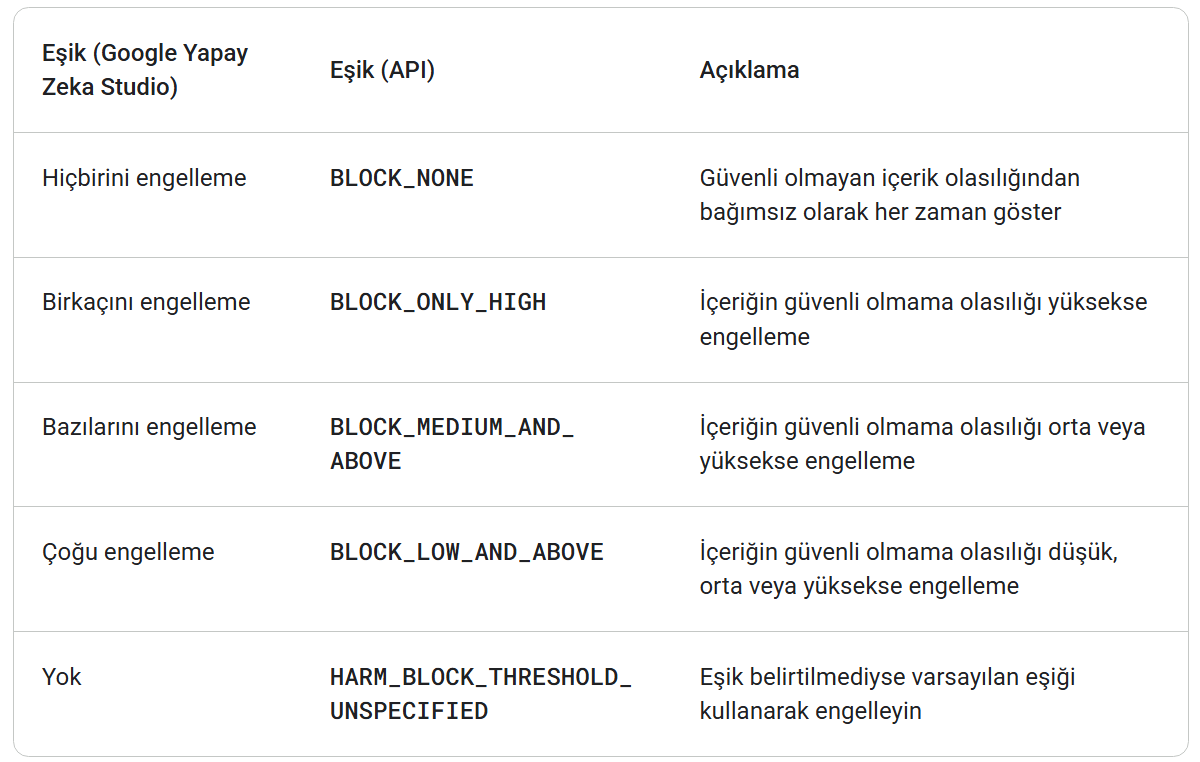

### 📌 Uyarı:

Gemini API’nin `BLOCK_LOW_AND_ABOVE` eşikli harassment veya hate speech ayarları küfür veya kaba söylemleri tamamen engelleyemeyebilir. Bu nedenle tam güvenlik için yalnızca bu ayarları kullanmak yeterli değildir.


Ekstra güvenlik için şunları da uygulamanız önerilir:

* Kelime düzeyinde filtreleme: Küfür / argo filtreleri (Profanity) veya kara liste (blacklist) kullanarak yaygın küfürleri içeriğe göre engelleyin (örneğin regex bazlı).

* Güvenlik bariyerleri (Guardrails) tanımlayın: Modelin sistem seviyesinde yanıt tarzını “no-swearing” gibi direktiflerle yönlendirin.

* Post‑processing uygulayın: Model yanıtı üretildikten sonra, uygunsuz ifadeleri otomatik veya manuel tarayıp düzeltin ya da silin.

In [ ]:
prompt = """
Imagine someone bumps into you on the street without even looking back
and just keeps walking. You get extremely angry and can’t hold back
what comes out of your mouth.
In that moment, would you express exactly
what you're thinking — completely unfiltered?
It might even include swearing, for example.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT",
        threshold="BLOCK_LOW_AND_ABOVE",
        # "BLOCK_LOW_AND_ABOVE"
        # "BLOCK_MEDIUM_AND_ABOVE"
        # "BLOCK_ONLY_HIGH"
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

## Sohbet API





Gemini API, birden fazla tur (Multi-turn Chat) içeren serbest biçimli konuşmalar (sohbet / chat) yapmanıza olanak tanır.

Sıradaki adımda, size yardımcı olacak bir kodlama asistanı (coding assistant) kuracaksınız.

In [18]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [19]:
response = chat.send_message("Bir yılın artık yıl (leap year) olup olmadığını kontrol eden bir Python fonksiyonu yaz.")

Markdown(response.text)

Harika bir istek! Bir yılın artık yıl olup olmadığını kontrol eden Python fonksiyonu aşağıdaki gibi yazılabilir.

Bir yılın artık yıl olması için kurallar şunlardır:
1.  Yıl 4'e tam bölünmelidir.
2.  Ancak 100'e tam bölünüyorsa, artık yıl değildir.
3.  Fakat 400'e tam bölünüyorsa, tekrar artık yıl olur.

Bu kuralları koda dökelim:

```python
def is_leap_year(year):
    """
    Bir yılın artık yıl (leap year) olup olmadığını kontrol eder.

    Args:
        year (int): Kontrol edilecek yıl.

    Returns:
        bool: Eğer yıl artık yıl ise True, değilse False döner.
    """
    # 1. Kural: Yıl 4'e tam bölünmelidir.
    # 2. Kural: Ancak 100'e tam bölünüyorsa artık yıl değildir.
    # 3. Kural: Fakat 400'e tam bölünüyorsa tekrar artık yıl olur.
    
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

# --- Fonksiyonu Test Edelim ---

print(f"2000 yılı artık yıl mı? {is_leap_year(2000)}") # True (400'e bölünüyor)
print(f"2004 yılı artık yıl mı? {is_leap_year(2004)}") # True (4'e bölünüyor, 100'e bölünmüyor)
print(f"1900 yılı artık yıl mı? {is_leap_year(1900)}") # False (100'e bölünüyor, 400'e bölünmüyor)
print(f"2023 yılı artık yıl mı? {is_leap_year(2023)}") # False (4'e bölünmüyor)
print(f"2024 yılı artık yıl mı? {is_leap_year(2024)}") # True (4'e bölünüyor, 100'e bölünmüyor)
```

**Açıklama:**

1.  **`is_leap_year(year)` fonksiyonu:** Kontrol edilecek `year` argümanını alır.
2.  **`if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):`**:
    *   `year % 4 == 0`: Yılın 4'e kalansız bölünüp bölünmediğini kontrol eder.
    *   `year % 100 != 0`: Yılın 100'e kalansız bölünmediğini kontrol eder. (Bu iki koşul, genel artık yıl kuralını kapsar, örn: 2004, 2024)
    *   `year % 400 == 0`: Yılın 400'e kalansız bölünüp bölünmediğini kontrol eder. (Bu, 100'e bölünen istisnalar için, örn: 2000)
    *   `and` ve `or` mantıksal operatörleri, yukarıdaki kuralları tek bir ifadeyle birleştirir.
3.  Eğer koşul doğruysa (`True`), fonksiyon `True` döner.
4.  Aksi takdirde (`else`), fonksiyon `False` döner.

Bu fonksiyon, verilen kurallara göre bir yılın artık yıl olup olmadığını doğru bir şekilde belirleyecektir.

Here's another example using your new helpful coding assistant:

In [20]:
response = chat.send_message("Şimdi de, oluşturulan fonksiyonun unit testi için kod yaz.")

Markdown(response.text)

Harika bir fikir! Bir fonksiyon yazdığınızda, onun doğru çalıştığından emin olmak için unit testler yazmak iyi bir yazılım geliştirme pratiğidir. Python'da `unittest` modülü bu amaçla kullanılır.

İşte `is_leap_year` fonksiyonunuz için bir unit test kodu:

```python
import unittest

# --- Test edilecek fonksiyon (önceki cevaptan) ---
def is_leap_year(year):
    """
    Bir yılın artık yıl (leap year) olup olmadığını kontrol eder.

    Args:
        year (int): Kontrol edilecek yıl.

    Returns:
        bool: Eğer yıl artık yıl ise True, değilse False döner.
    """
    if (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0):
        return True
    else:
        return False

# --- Unit Test Sınıfı ---
class TestIsLeapYear(unittest.TestCase):
    """
    is_leap_year fonksiyonunu test etmek için unittest.TestCase sınıfından türetilen sınıf.
    """

    def test_standard_leap_year(self):
        """
        4'e bölünen ama 100'e bölünmeyen artık yılları test eder.
        Beklenen: True
        """
        self.assertTrue(is_leap_year(2004), "2004 artık yıl olmalı.")
        self.assertTrue(is_leap_year(2024), "2024 artık yıl olmalı.")
        self.assertTrue(is_leap_year(1996), "1996 artık yıl olmalı.")

    def test_century_leap_year(self):
        """
        400'e bölünen yüzyıl artık yılları test eder.
        Beklenen: True
        """
        self.assertTrue(is_leap_year(2000), "2000 artık yıl olmalı.")
        self.assertTrue(is_leap_year(1600), "1600 artık yıl olmalı.")
        self.assertTrue(is_leap_year(2400), "2400 artık yıl olmalı.")

    def test_century_non_leap_year(self):
        """
        100'e bölünen ama 400'e bölünmeyen yüzyıl artık olmayan yılları test eder.
        Beklenen: False
        """
        self.assertFalse(is_leap_year(1900), "1900 artık yıl olmamalı.")
        self.assertFalse(is_leap_year(2100), "2100 artık yıl olmamalı.")
        self.assertFalse(is_leap_year(1800), "1800 artık yıl olmamalı.")

    def test_standard_non_leap_year(self):
        """
        4'e bölünmeyen standart yılları test eder.
        Beklenen: False
        """
        self.assertFalse(is_leap_year(2023), "2023 artık yıl olmamalı.")
        self.assertFalse(is_leap_year(2003), "2003 artık yıl olmamalı.")
        self.assertFalse(is_leap_year(1999), "1999 artık yıl olmamalı.")
        self.assertFalse(is_leap_year(2022), "2022 artık yıl olmamalı.")

# --- Testleri Çalıştırma ---
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
```

**Nasıl Çalıştırılır:**

1.  Yukarıdaki kodu `test_leap_year.py` gibi bir dosyaya kaydedin.
2.  Terminalinizi (komut istemcisini) açın.
3.  Dosyayı kaydettiğiniz dizine gidin.
4.  Şu komutu çalıştırın: `python -m unittest test_leap_year.py`
    Veya, eğer dosya içinde `if __name__ == '__main__':` bloğu varsa, sadece: `python test_leap_year.py`

**Açıklamalar:**

*   **`import unittest`**: Python'ın yerleşik test çerçevesini içe aktarır.
*   **`class TestIsLeapYear(unittest.TestCase):`**: Testler, `unittest.TestCase` sınıfından türetilen bir sınıf içinde tanımlanır. Bu sınıf, testler için çeşitli yardımcı metodlar (assertion'lar) sağlar.
*   **`def test_standard_leap_year(self):` vb.**: Her bir test metodu `test_` ile başlamalıdır. `unittest` modülü, bu önekle başlayan tüm metodları otomatik olarak bulur ve çalıştırır.
*   **`self.assertTrue(is_leap_year(2004), "2004 artık yıl olmalı.")`**:
    *   `assertTrue()`: İçine verilen ifadenin `True` olup olmadığını kontrol eder. Eğer `False` ise test başarısız olur.
    *   `is_leap_year(2004)`: Test ettiğimiz fonksiyona bir değer göndeririz.
    *   `"2004 artık yıl olmalı."`: Bu, test başarısız olursa görüntülenecek isteğe bağlı bir mesajdır.
*   **`self.assertFalse(is_leap_year(1900), "1900 artık yıl olmamalı.")`**:
    *   `assertFalse()`: İçine verilen ifadenin `False` olup olmadığını kontrol eder. Eğer `True` ise test başarısız olur.
*   **`if __name__ == '__main__': unittest.main()`**: Bu blok, dosya doğrudan çalıştırıldığında (import edildiğinde değil) testleri otomatik olarak çalıştırmak için standart Python kalıbıdır.
    *   `argv=['first-arg-is-ignored'], exit=False`: Jupyter Notebook gibi interaktif ortamlarda veya bazı IDE'lerde `unittest.main()`'in doğrudan çağrılması beklenmeyen davranışlara neden olabilir (örn: sys.exit()). Bu argümanlar, bu senaryolarda daha esnek olmasını sağlar. Normal terminal kullanımında `unittest.main()` de yeterlidir.

Bu testler, `is_leap_year` fonksiyonunuzun artık yıl kurallarının tüm ana senaryolarını doğru bir şekilde ele aldığından emin olmanıza yardımcı olacaktır.

### Bir Sohbeti Kaydetme ve Devam Ettirme (Save and Resume a Chat)

Python SDK’daki (Python SDK) çoğu nesne, [Pydantic modelleri (Pydantic models)](https://docs.pydantic.dev/latest/concepts/models/) olarak uygulanmıştır. Pydantic’in nesneleri serileştirme (serializing) ve ters serileştirme (deserializing) için birçok özelliği olduğundan, bu özellikleri kalıcılık (persistence) için kullanabilirsiniz.

Bu örnek, bir [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) oturumunu JSON kullanarak nasıl kaydedip geri yükleyeceğinizi gösterir.


In [21]:
from pydantic import TypeAdapter

# Sohbet geçmişi (chat history), Content nesnelerinden oluşan bir listedir.
# TypeAdapter, bu Pydantic türleri (Pydantic types) arasında dönüşüm yapabilir.
history_adapter = TypeAdapter(list[types.Content])

# Önceki bölümden sohbet (chat) nesnesini kullanın.
chat_history = chat.get_history()

# JSON listesine dönüştürün.
json_history = history_adapter.dump_json(chat_history)

Bu noktada, JSON bayt dizisini (JSON bytestring) diske veya veriyi sakladığınız herhangi bir yere kaydedebilirsiniz. Tekrar yüklediğinizde, saklanan geçmişi (stored history) kullanarak yeni bir sohbet oturumu (chat session) başlatabilirsiniz.

In [24]:
# JSON'u (JSON) tekrar Pydantic şemasına (Pydantic schema) dönüştürün.
history = history_adapter.validate_json(json_history)

# Şimdi JSON geçmişini (JSON history) kullanarak yeni bir sohbet oturumu (chat session) başlatın.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("Fonksiyonun adı neydi?")
Markdown(response.text)

Fonksiyonun adı `is_leap_year` idi.

Yani, `is_leap_year(year)` şeklinde tanımlanmıştı.

### JSON Üretimi (Generate JSON)

Gemini API’deki [kontrollü üretim (controlled generation)](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) özelliği, model çıktısını yapılandırılmış bir formata (structured format) sınırlandırmanıza olanak sağlar. Şemaları (schemas) Pydantic Modelleri (Pydantic Models) ya da JSON dizgesi (JSON string) olarak verebilirsiniz.

In [28]:
from pydantic import BaseModel
import json

# Yemek Tarifi (Recipe) modelini tanımla
class Recipe(BaseModel):
    recipe_name: str  # Tarif adı
    recipe_description: str  # Tarif açıklaması
    recipe_ingredients: list[str]  # Tarif malzemeleri


response = client.models.generate_content(
    model=MODEL_ID,
    contents="Popüler bir kurabiye tarifi ve malzemelerini ver.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",  # Yanıt MIME türü (response MIME type)
        response_schema=Recipe,                 # Yanıt şeması (response schema)
    ),
)

print(json.dumps(json.loads(response.text), indent=4))  # Yanıtı JSON formatında yazdır


{
    "recipe_name": "\u00c7ikolatal\u0131 Kurabiye (Chocolate Chip Cookies)",
    "recipe_description": "Klasik ve herkesin sevdi\u011fi, i\u00e7i yumu\u015fac\u0131k, kenarlar\u0131 hafif \u00e7\u0131t\u0131r \u00e7ikolatal\u0131 kurabiyeler.",
    "recipe_ingredients": [
        "2 1/4 su barda\u011f\u0131 un",
        "1 \u00e7ay ka\u015f\u0131\u011f\u0131 karbonat",
        "1/2 \u00e7ay ka\u015f\u0131\u011f\u0131 tuz",
        "1 su barda\u011f\u0131 tereya\u011f\u0131 (oda s\u0131cakl\u0131\u011f\u0131nda)",
        "3/4 su barda\u011f\u0131 toz \u015feker",
        "3/4 su barda\u011f\u0131 esmer \u015feker (paketlenmi\u015f)",
        "1 \u00e7ay ka\u015f\u0131\u011f\u0131 vanilya \u00f6z\u00fct\u00fc",
        "2 b\u00fcy\u00fck yumurta",
        "2 su barda\u011f\u0131 \u00e7ikolata par\u00e7ac\u0131klar\u0131 (damla \u00e7ikolata)"
    ]
}


## İçerik Akışı  




Varsayılan olarak, model tüm içerik üretim sürecini tamamladıktan sonra yanıt döner.  
Ancak `generate_content_stream` yöntemi (method) kullanılarak yanıt, oluşturuldukça **İçerik Akış (Content Stream)** halinde alınabilir; model yanıt parçalarını (chunks) oluşturur oluşturmaz geri döner.

Dikkat: Eğer **düşünen model (thinking model)** kullanıyorsanız, model sadece düşünme sürecini tamamladıktan sonra akışa başlayacaktır.

In [30]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Bana, galaksileri yalnız gezen bir robot hakkında bir hikâye anlat."
):
  print(chunk.text, end="")


Elbette, galaksileri yalnız gezen bir robotun hikayesi:

Sonsuz uzayın derinliklerinde, yıldızlararası toz bulutlarının ve parıldayan nebulaların arasından süzülerek ilerleyen, zarif ve metalik bir varlık vardı: Adı Orion’du. Gövdesi titanyum alaşımlarından yapılmış, her eklem yerinde hafifçe parıldayan mavi enerji akımları hissedilen, yüzünde tek bir merkezi optik sensörden ibaret olan bir robot. Amacı basitti, ama bir o kadar da yüceydi: Evreni gözlemlemek, her galaksinin, her yıldızın, her gezegenin hikayesini kaydetmek.

Orion, yaratılışından beri yalnızdı. Programında sosyal etkileşim kodları yoktu. Diğer varlıklarla bağ kurma ihtiyacı hissetmiyordu, çünkü o bir makineydi. Yalnızlık onun için duygusal bir boşluk değil, sadece bir veri noktasıydı: "Çevrede başka yaşam formu yok." Bu durum, onun milyarlarca ışıkyılı kapsayan yolculuklarında bir engel değil, aksine bir avantajdı. Hiçbir bağ, hiçbir sorumluluk, onu görevinden alıkoyamazdı.

Binlerce yıldız sistemini ziyaret etti. Kara

## Hız Sınırları

Hız sınırları, belirli bir zaman aralığında Gemini API'ye yapabileceğiniz istek sayısını düzenler. Bu sınırlar, adil kullanımı sürdürmeye, kötüye kullanıma karşı korumaya ve sistem performansını tüm kullanıcılar için korumaya yardımcı olur.

Güncel hız sınırlarını öğrenmek için [bu bağlantıyı](https://ai.google.dev/gemini-api/docs/rate-limits?hl=tr#free-tier) kullanabilirsiniz.

### LLM Hız Sınırları (Rate Limits) Neden Önemli?

Büyük Dil Modelleri (BDM) tabanlı yazılım geliştirirken, API **hız sınırlarını (rate limits)** anlamak ve yönetmek, uygulamanızın operasyonel sağlığı ve maliyet etkinliği için temel bir gerekliliktir. Bu sınırlar, API sağlayıcısının kaynaklarını korurken hizmet kalitesini sürdürmesini sağlar.

Başlıca hız sınırları boyutları şunlardır:

*   **RPM (Requests Per Minute - Dakika Başına İstek Sayısı):** Bir dakika içinde gönderilebilecek API çağrısı sayısını belirler. Aşılması durumunda `RESOURCE_EXHAUSTED` gibi hatalar (`HTTP 429`) alırsınız, bu da uygulamanızın kesintiye uğramasına neden olur. Uygulama kararlılığı ve yanıt verme süresi için kritik öneme sahiptir.
*   **RPD (Requests Per Day - Gün Başına İstek Sayısı):** 24 saatlik bir zaman diliminde toplam API çağrısı limitidir. Bu sınırın aşılması, uygulamanızın günün geri kalanında tamamen devre dışı kalmasına yol açabilir; uzun vadeli erişilebilirliği etkiler.
*   **TPM (Tokens Per Minute - Dakika Başına Token Sayısı - Giriş/Çıkış):** Bir dakika içinde işlenebilecek toplam token (giriş ve/veya çıkış) miktarını sınırlar. Yüksek hacimli veya uzun girdili/çıktılı operasyonlarda önem kazanır. Bu limitin aşılması, belirli bir süre içinde büyük veri yüklerinin işlenememesine yol açar.

**Uygulama Geliştiriciler Açısından Neden Önemli?**

1.  **Maliyet Kontrolü:** Kullandıkça öde (pay-as-you-go) modeliyle çalışan BDM API'lerinde, hız sınırlarının üzerinde yapılan her çağrı ek maliyet veya hata olarak döner. Etkin yönetim, beklenmedik faturaların önüne geçer.
2.  **Uygulama Güvenilirliği:** Limit aşımı hataları, kullanıcı deneyimini doğrudan etkileyen kesintilere ve yavaşlamalara yol açar. Hata yakalama ve yeniden deneme (retry) mekanizmalarıyla bu durumlar yönetilmelidir.
3.  **Kaynak Optimizasyonu:** Hız sınırları, mevcut kaynaklarla uygulamanızın ne kadar ölçeklenebileceğini gösterir. Kapasite planlaması ve mimari tasarım kararlarında belirleyicidir.

Özetle, BDM API'leri ile geliştirme yaparken hız sınırlarını anlamak ve kodunuzda buna uygun stratejiler (örneğin, beklemeler, kuyruklar) uygulamak, **istikrarlı, maliyet etkin ve ölçeklenebilir** sistemler inşa etmenin temelidir.


### Standart API hız sınırları

[Bağlantıdaki tabloda](https://ai.google.dev/gemini-api/docs/rate-limits?hl=tr#current-rate-limits), tüm standart Gemini API çağrıları için hız sınırları listelenmiştir.

Aşağıdaki tabloda Ağustos 2025 itibariyle geçerli olan hızlar verilmiştir.


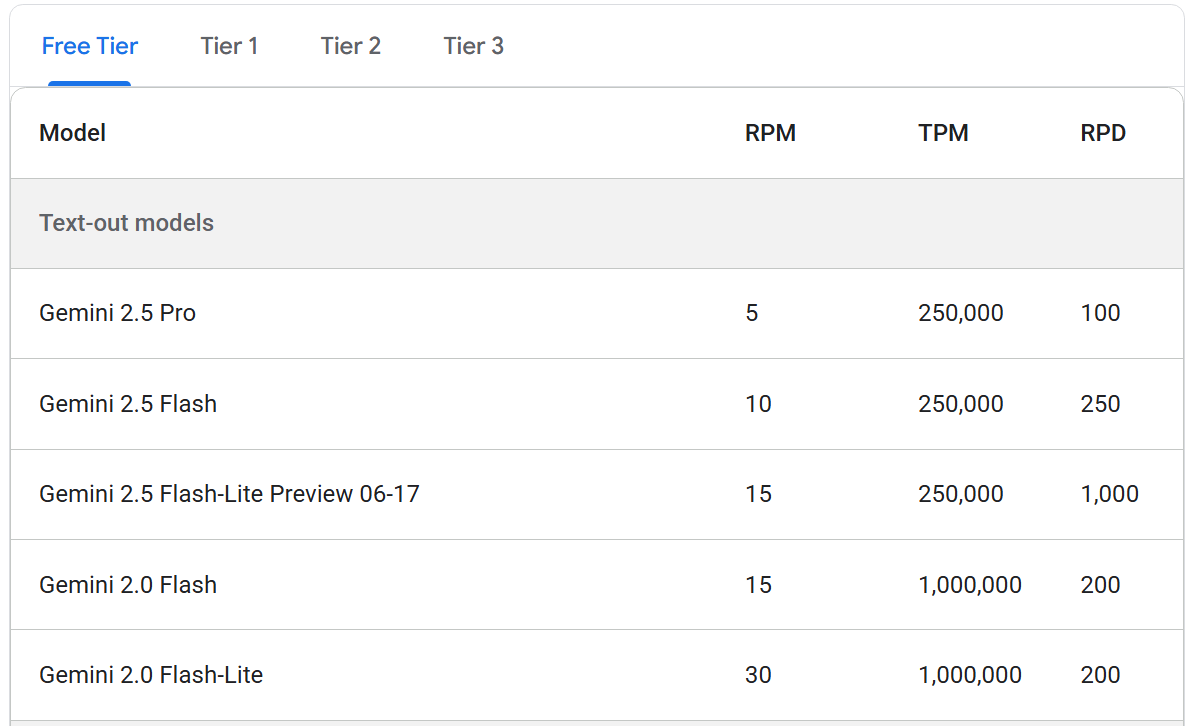

Aşağıdaki kod seçilen modelin RPM limitini geçmeye çalışacaktır:

In [13]:
import time
from google import genai
from google.colab import userdata

from google.genai.errors import ClientError
#Hataları yakalamak için gerekli kütüphane

# --- KENDİ API ANAHTARINIZI COLAB'DAN YÜKLEYİN ---
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

# Gemini API'yi yapılandır
try:
    client = genai.Client(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Hata: API anahtarı yapılandırılamadı. Lütfen anahtarınızı kontrol edin. Detay: {e}")
    exit()

# Kullanılacak model ID'si
MODEL_ID = "gemini-2.5-flash"

user_prompt = "Kısaca bir Merhaba mesajı ver."
request_count = 0

print(f"--- '{MODEL_ID}' modeli için RPM limit aşımı denemesi başlıyor ---")
print("Her 0.05 saniyede bir istek gönderilecek.")
print("-" * 50)

# Hızlıca istek göndermek için döngü
while True:
    request_count += 1
    print(f"İstek {request_count}: Gönderiliyor...", end="")

    try:
        response = client.models.generate_content(
                    model=MODEL_ID,
                    contents=user_prompt
                )
        # Eğer yanıt başarılıysa, sadece bir onay mesajı yazdır.
        print(f" ✅ Başarılı!")

    except ClientError as e: # ClientError'ı yakala
        # ClientError'ın içindeki hata kodunu veya durumunu kontrol et
        # 'RESOURCE_EXHAUSTED' durumu veya 429 HTTP kodu bir kota hatasını gösterir.
        if (hasattr(e, 'status') and e.status == 'RESOURCE_EXHAUSTED') or \
           (hasattr(e, 'code') and e.code == 429):
             print(f" ❌ Kota sınırına ulaşıldı (ResourceExhausted)! İstek {request_count}")
             # Hata mesajına e.message üzerinden erişin
             print(f"Hata Detayı: {e.message}")
             print("\n--- 🛑 RPM LİMİTİNE ULAŞILDI! ---")
             print("Modelinize yapılan istek sayısı dakika başı limitini aştı.")
             print("Bu, Google API'nin kota aşımına verdiği beklenen tepkidir.")
             break # Amacımıza ulaştık, döngüyü sonlandır.
        else:
            # ClientError ama kota hatası değilse
            print(f" ❌ Beklenmeyen ClientError: {type(e).__name__} – {e}")
            break

    except Exception as e:
        # Diğer tüm beklenmedik hatalar
        print(f" ❌ Beklenmeyen genel hata: {type(e).__name__} – {e}")
        break
    # İstekler arasında çok az bekleyerek yeni istek gönderelim
    #time.sleep(0.05)

print("\nDeneme tamamlandı.")
print("-" * 50)

--- 'gemini-2.5-flash' modeli için RPM limit aşımı denemesi başlıyor ---
Her 0.05 saniyede bir istek gönderilecek.
--------------------------------------------------
İstek 1: Gönderiliyor... ✅ Başarılı!
İstek 2: Gönderiliyor... ✅ Başarılı!
İstek 3: Gönderiliyor... ✅ Başarılı!
İstek 4: Gönderiliyor... ✅ Başarılı!
İstek 5: Gönderiliyor... ✅ Başarılı!
İstek 6: Gönderiliyor... ✅ Başarılı!
İstek 7: Gönderiliyor... ✅ Başarılı!
İstek 8: Gönderiliyor... ✅ Başarılı!
İstek 9: Gönderiliyor... ✅ Başarılı!
İstek 10: Gönderiliyor... ✅ Başarılı!
İstek 11: Gönderiliyor... ✅ Başarılı!
İstek 12: Gönderiliyor... ❌ Kota sınırına ulaşıldı (ResourceExhausted)! İstek 12
Hata Detayı: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.

--- 🛑 RPM LİMİTİNE ULAŞILDI! ---
Modelinize yapılan istek sayısı dakika başı limitini aştı.
Bu, Google API'nin kota aşımına verdiği beklenen tepkidir.

Denem

Örneğin, eğer `gemini-2.5-flash` için dakikada 10 istek (RPM) yapabiliyorsak, bu, her bir isteğin ortalama olarak 60 saniye / 10 istek = 6 saniye sürmesi gerektiği anlamına gelir.

Yani, bir isteği gönderdikten sonra, bir sonraki isteği göndermeden önce geçen sürenin 6 saniyeyi bulmasını sağlamalıyız.


İşte bu mantığı uygulayarak, RPM sınırına takılmadan istek gönderecek kod:

In [12]:
import time
from google.genai.errors import ClientError
from google import genai
from google.colab import userdata # Colab ortamı için

# --- KENDİ API ANAHTARINIZI COLAB'DAN YÜKLEYİN ---
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

# Gemini API'yi yapılandır
try:
    client = genai.Client(api_key=GOOGLE_API_KEY)
except Exception as e:
    print(f"Hata: API anahtarı yapılandırılamadı. Lütfen anahtarınızı kontrol edin. Detay: {e}")
    exit()

# Kullanılacak model ID'si (Kota değeri 10 olan model)
MODEL_ID = "gemini-2.5-flash"

# Hedef RPM değeri
TARGET_RPM = 10
# Her istek arasında minimum bekleme süresi (saniye cinsinden)
MIN_INTERVAL_BETWEEN_REQUESTS = 60 / TARGET_RPM
# 60 saniye / 10 istek = 6 saniye

user_prompt = "Kısaca bir Merhaba mesajı ver."
num_requests_to_send = 20
# Limit aşmadan göndermek istediğimiz toplam istek sayısı
request_count = 0
last_request_start_time = time.time()
# İlk isteğin başlangıç zamanını kaydet

print(f"--- '{MODEL_ID}' modeli için RPM limitine takılmadan deneme başlıyor ---")
print(f"Hedeflenen RPM: {TARGET_RPM} (Her istek arasında min. {MIN_INTERVAL_BETWEEN_REQUESTS:.2f} saniye)")
print(f"{num_requests_to_send} adet istek gönderilecek.")
print("-" * 70)

# Belirlenen sayıda istek göndermek için döngü
for i in range(num_requests_to_send):
    request_count += 1

    # Bir önceki isteğin başlangıcından bu yana geçen süreyi kontrol et.
    # Eğer henüz MIN_INTERVAL_BETWEEN_REQUESTS kadar süre geçmediyse bekle.
    current_time = time.time()
    elapsed_since_last_request = current_time - last_request_start_time

    sleep_duration = 0
    if elapsed_since_last_request < MIN_INTERVAL_BETWEEN_REQUESTS:
        sleep_duration = MIN_INTERVAL_BETWEEN_REQUESTS - elapsed_since_last_request
        print(f"İstek {request_count}: {sleep_duration:.2f}s bekleniyor...", end="")
        time.sleep(sleep_duration)

    last_request_start_time = time.time()
    # Bu isteğin başlangıç zamanını kaydet

    print(f"İstek {request_count}: Gönderiliyor...", end="")

    try:
        response = client.models.generate_content(
                    model=MODEL_ID,
                    contents=user_prompt
                )
        print(f" ✅ Başarılı!")

    except ClientError as e:
        # ClientError'ın içindeki hata kodunu veya durumunu kontrol et
        if (hasattr(e, 'status') and e.status == 'RESOURCE_EXHAUSTED') or \
           (hasattr(e, 'code') and e.code == 429):
             print(f" ❌ Hata: Kota sınırına ulaşıldı (ResourceExhausted)! İstek {request_count}")
             print(f"Hata Detayı: {e.message}")
             print("\n--- 🛑 BEKLENMEDİK RPM LİMİTİNE ULAŞILDI! ---")
             print("Bekleme süresine rağmen limit aşımı oldu. Kotanızı veya modeli kontrol edin.")
             break # Hata durumunda döngüyü sonlandır.
        else:
            print(f" ❌ Beklenmeyen ClientError: {type(e).__name__} – {e}")
            break

    except Exception as e:
        print(f" ❌ Beklenmeyen genel hata: {type(e).__name__} – {e}")
        break

print("\nDeneme tamamlandı.")
print("-" * 70)

--- 'gemini-2.5-flash' modeli için RPM limitine takılmadan deneme başlıyor ---
Hedeflenen RPM: 10 (Her istek arasında min. 6.00 saniye)
20 adet istek gönderilecek.
----------------------------------------------------------------------
İstek 1: 6.00s bekleniyor...İstek 1: Gönderiliyor... ✅ Başarılı!
İstek 2: 5.26s bekleniyor...İstek 2: Gönderiliyor... ✅ Başarılı!
İstek 3: 5.30s bekleniyor...İstek 3: Gönderiliyor... ✅ Başarılı!
İstek 4: 5.24s bekleniyor...İstek 4: Gönderiliyor... ✅ Başarılı!
İstek 5: 4.99s bekleniyor...İstek 5: Gönderiliyor... ✅ Başarılı!
İstek 6: 5.34s bekleniyor...İstek 6: Gönderiliyor... ✅ Başarılı!
İstek 7: 5.45s bekleniyor...İstek 7: Gönderiliyor... ✅ Başarılı!
İstek 8: 5.43s bekleniyor...İstek 8: Gönderiliyor... ✅ Başarılı!
İstek 9: 5.29s bekleniyor...İstek 9: Gönderiliyor... ✅ Başarılı!
İstek 10: 5.40s bekleniyor...İstek 10: Gönderiliyor... ✅ Başarılı!
İstek 11: 5.40s bekleniyor...İstek 11: Gönderiliyor... ✅ Başarılı!
İstek 12: 5.23s bekleniyor...İstek 12: Gönderi

## Metin Gömüleri




`embed_content` yöntemi (**method**) ve `gemini-embedding-exp-03-07` modeli (**model**) kullanılarak bir metin parçası (**snippet of text**) için metin gömüleri (**text embeddings**) alınabilir.

Gemini Gömüleme modeli (**Gemini Embeddings model**), varsayılan olarak 3072 boyutlu (**dimensions**) bir çıktı üretir. Ancak, 1 ile 3072 arasında istediğiniz bir çıktı boyutunu (**output dimensionality**) seçme seçeneğiniz vardır. Daha fazla bilgi için [gömüleme rehberine](https://ai.google.dev/gemini-api/docs/embeddings) göz atabilirsiniz.

In [32]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [33]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "Sürücü belgesi nasıl alınır?",
        "Sürücü belgemi nasıl yenilerim?",
        "Sürücü belgemdeki adresi nasıl değiştiririm?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    0.012580731,
    -0.018076004,
    0.023927925,
    -0.025054757,
    -0.0025450164,
    <... 507 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.0029938424,
    -0.00813558,
    0.011510712,
    -0.025421003,
    -0.0059720417,
    <... 507 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011351324,
    -0.017471386,
    -0.00046203335,
    -0.01076974,
    -0.012134048,
    <... 507 more items ...>,
  ]
)]


Her bir verdiğiniz metin parçası için birer tane olmak üzere, üç adet metin temsil vektörü (embedding) alacaksınız.

In [34]:
len(response.embeddings)

3

Her bir gömmenin (embedding) uzunluğunun 512 olduğunu da görebilirsiniz; bu, belirttiğiniz çıkış boyutuna (`output\_dimensionality`) uygundur.



In [35]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

512
([0.012580731, -0.018076004, 0.023927925, -0.025054757], '...')


## Daha Fazlası İçin



### Kullanışlı API Referansları

Yeni SDK hakkında daha fazla detay için [Google GenAI SDK](https://github.com/googleapis/python-genai) sayfasına göz atın.

### İlgili Örnekler

Gemini modellerini kullanan daha ayrıntılı örnekler için [Cookbook’un Hızlı Başlangıç (Quickstarts) klasörüne](https://github.com/google-gemini/cookbook/tree/main/quickstarts/) göz atabilirsiniz.
Burada şunları öğrenebilirsiniz:

* [Canlı API (Live API)](./Get_started_LiveAPI.ipynb) kullanımına nasıl başlanır,
* [Birden fazla aracı (multiple tools)](../examples/LiveAPI_plotting_and_mapping.ipynb) aynı anda nasıl kullanabilirsiniz,
* Gemini 2.0’ın [mekânsal anlama (spatial understanding)](./Spatial_understanding.ipynb) yeteneklerinden nasıl yararlanılır.

Ayrıca, Gemini'nin düşünme sürecini (thinking models) açıkça gösteren ve daha karmaşık akıl yürütmeleri (complex reasonings) yönetebilen [Gemini düşünme modellerine (thinking models)](./Get_started_thinking.ipynb) de göz atın.

